# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
# X ; Y; Z; Pressure; GripAngle; Timestamp; Test ID
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from Utils import createFeatures, listPeopleArticle

# 2. Loading the Data Set

In [2]:
path_control = [
    'data_motion/hw_dataset/control/C_0001.txt',
    'data_motion/hw_dataset/control/C_0002.txt',
    'data_motion/hw_dataset/control/C_0003.txt',
    'data_motion/hw_dataset/control/C_0004.txt',
    'data_motion/hw_dataset/control/C_0005.txt',
    'data_motion/hw_dataset/control/C_0006.txt',
    'data_motion/hw_dataset/control/C_0007.txt',
    'data_motion/hw_dataset/control/C_0008.txt',
    'data_motion/hw_dataset/control/C_0009.txt',
    'data_motion/hw_dataset/control/C_0010.txt',
    'data_motion/hw_dataset/control/C_0011.txt',
    'data_motion/hw_dataset/control/C_0012.txt',
    'data_motion/hw_dataset/control/C_0013.txt',
    'data_motion/hw_dataset/control/C_0014.txt',
    'data_motion/hw_dataset/control/C_0015.txt'
]

In [3]:
path_parkinson = [
    'data_motion/hw_dataset/parkinson/P_02100001.txt',
    'data_motion/hw_dataset/parkinson/P_02100002.txt',
    'data_motion/hw_dataset/parkinson/P_05060003.txt',
    'data_motion/hw_dataset/parkinson/P_05060004.txt',
    'data_motion/hw_dataset/parkinson/P_09100001.txt',
    'data_motion/hw_dataset/parkinson/P_09100003.txt',
    'data_motion/hw_dataset/parkinson/P_09100005.txt',
    'data_motion/hw_dataset/parkinson/P_11120003.txt',
    'data_motion/hw_dataset/parkinson/P_11120004.txt',
    'data_motion/hw_dataset/parkinson/P_11120005.txt',
    'data_motion/hw_dataset/parkinson/P_12060001.txt',
    'data_motion/hw_dataset/parkinson/P_12060002.txt',
    'data_motion/hw_dataset/parkinson/P_16100003.txt',
    'data_motion/hw_dataset/parkinson/P_16100004.txt',
    'data_motion/hw_dataset/parkinson/P_23100002.txt',
    'data_motion/hw_dataset/parkinson/P_23100003.txt',
    'data_motion/hw_dataset/parkinson/P_26060001.txt',
    'data_motion/hw_dataset/parkinson/P_26060002.txt',
    'data_motion/hw_dataset/parkinson/P_26060003.txt',
    'data_motion/hw_dataset/parkinson/P_26060006.txt',
    'data_motion/hw_dataset/parkinson/P_26060007.txt',
    'data_motion/hw_dataset/parkinson/P_27110001.txt',
    'data_motion/hw_dataset/parkinson/P_27110003.txt',
    'data_motion/hw_dataset/parkinson/P_30100001.txt',
    'data_motion/hw_dataset/parkinson/P_30100002.txt',
    'data_motion/new_dataset/parkinson/H_P000-0001.txt',
    'data_motion/new_dataset/parkinson/H_P000-0002.txt',
    'data_motion/new_dataset/parkinson/H_P000-0003.txt',
    'data_motion/new_dataset/parkinson/H_P000-0004.txt',
    'data_motion/new_dataset/parkinson/H_P000-0007.txt',
    'data_motion/new_dataset/parkinson/H_P000-0008.txt',
    'data_motion/new_dataset/parkinson/H_p000-0010.txt',
    'data_motion/new_dataset/parkinson/H_P000-0011.txt',
    'data_motion/new_dataset/parkinson/H_P000-0012.txt',
    'data_motion/new_dataset/parkinson/H_P000-0013.txt',
    'data_motion/new_dataset/parkinson/H_P000-0014.txt',
    'data_motion/new_dataset/parkinson/H_P000-0015.txt',
    'data_motion/new_dataset/parkinson/H_P000-0016.txt',
    'data_motion/new_dataset/parkinson/H_p000-0017.txt',
    'data_motion/new_dataset/parkinson/H_p000-0018.txt',
    'data_motion/new_dataset/parkinson/H_P000-0019.txt',
    'data_motion/new_dataset/parkinson/H_P000-0020.txt',
    'data_motion/new_dataset/parkinson/H_P000-0021.txt',
    'data_motion/new_dataset/parkinson/H_P000-0022.txt',
    'data_motion/new_dataset/parkinson/H_P000-0023.txt',
    'data_motion/new_dataset/parkinson/H_P000-0024.txt',
    'data_motion/new_dataset/parkinson/H_P000-0025.txt',
    'data_motion/new_dataset/parkinson/H_p000-0028.txt',
    'data_motion/new_dataset/parkinson/H_P000-0029.txt',
    'data_motion/new_dataset/parkinson/H_P000-0030.txt',
    'data_motion/new_dataset/parkinson/H_P000-0031.txt',
    'data_motion/new_dataset/parkinson/H_P000-0032.txt',
    'data_motion/new_dataset/parkinson/H_P000-0033.txt',
    'data_motion/new_dataset/parkinson/H_P000-0034.txt',
    'data_motion/new_dataset/parkinson/H_P000-0035.txt',
    'data_motion/new_dataset/parkinson/H_P000-0036.txt',
    'data_motion/new_dataset/parkinson/H_P000-0037.txt',
    'data_motion/new_dataset/parkinson/H_P000-0039.txt',
    'data_motion/new_dataset/parkinson/H_P000-0040.txt',
    'data_motion/new_dataset/parkinson/H_p000-0041.txt',
    'data_motion/new_dataset/parkinson/H_p000-0042.txt',
    'data_motion/new_dataset/parkinson/H_p000-0043.txt'
]

# 3. Computing Features

In [4]:
Fs = 133

In [5]:
listControl_0 = listPeopleArticle(path_control, Fs, 0)
listParkinson_0 = listPeopleArticle(path_parkinson, Fs, 0)
listControl_1 = listPeopleArticle(path_control, Fs, 1)
listParkinson_1 = listPeopleArticle(path_parkinson, Fs, 1)
listControl_2 = listPeopleArticle(path_control, Fs, 2)
listParkinson_2 = listPeopleArticle(path_parkinson, Fs, 2)

In [6]:
listControl_0, controlDiagnoses_0 = createFeatures(listControl_0, 0)
listParkinson_0, parkinsonDiagnoses_0 = createFeatures(listParkinson_0, 1)
listControl_1, controlDiagnoses_1 = createFeatures(listControl_1, 0)
listParkinson_1, parkinsonDiagnoses_1 = createFeatures(listParkinson_1, 1)
listControl_2, controlDiagnoses_2 = createFeatures(listControl_2, 0)
listParkinson_2, parkinsonDiagnoses_2 = createFeatures(listParkinson_2, 1)

# 4. Visualizing the Data Info

In [7]:
print(f"Número de pessoas saudáveis no TestID 0: {listControl_0.shape[0]}")
print(f"Número de pessoas saudáveis no TestID 1: {listControl_1.shape[0]}")
print(f"Número de pessoas saudáveis no TestID 2: {listControl_2.shape[0]}")
print(f"Número de pessoas saudáveis no total: {listControl_0.shape[0]+listControl_1.shape[0]+listControl_2.shape[0]}")

Número de pessoas saudáveis no TestID 0: 15
Número de pessoas saudáveis no TestID 1: 15
Número de pessoas saudáveis no TestID 2: 0
Número de pessoas saudáveis no total: 30


In [8]:
print(f"Número de pessoas com Parkinson no TestID 0: {listParkinson_0.shape[0]}")
print(f"Número de pessoas com Parkinson no TestID 1: {listParkinson_1.shape[0]}")
print(f"Número de pessoas com Parkinson no TestID 2: {listParkinson_2.shape[0]}")
print(f"Número de pessoas com Parkinson no total: {listParkinson_0.shape[0]+listParkinson_1.shape[0]+listParkinson_2.shape[0]}")

Número de pessoas com Parkinson no TestID 0: 61
Número de pessoas com Parkinson no TestID 1: 57
Número de pessoas com Parkinson no TestID 2: 36
Número de pessoas com Parkinson no total: 154


In [9]:
listPerson = pd.concat([listControl_0, listParkinson_0,listControl_1,listParkinson_1,listControl_2,listParkinson_2])
listDiagnoses = np.concatenate([controlDiagnoses_0, parkinsonDiagnoses_0,controlDiagnoses_1,parkinsonDiagnoses_1,controlDiagnoses_2, parkinsonDiagnoses_2])

In [10]:
zero = 0
um = 0
for i in range(len(listDiagnoses)):
    if listDiagnoses[i]==0:
        zero += 1
    else:
        um += 1
        
print(f'Paciêntes sem Parkinson = {zero}')
print(f"Paciêntes com Parkinson = {um}")

Paciêntes sem Parkinson = 30
Paciêntes com Parkinson = 154


# 5. Applying Oversampling

In [11]:
ros = RandomOverSampler(random_state=0)
ros.fit(listPerson, listDiagnoses)
listPerson, listDiagnoses= ros.fit_resample(listPerson, listDiagnoses)

In [12]:
zero = 0
um = 0
for i in range(len(listDiagnoses)):
    if listDiagnoses[i]==0:
        zero += 1
    else:
        um += 1

print(f'Paciêntes sem Parkinson = {zero}')
print(f"Paciêntes com Parkinson = {um}")

Paciêntes sem Parkinson = 154
Paciêntes com Parkinson = 154


In [13]:
pd.set_option('display.max_rows', None)

In [14]:
display(listPerson)

,velocityWeighted,pressureWeighted,CISP
0,112.970303,884.200931,99888.447354
1,85.019028,788.450502,67033.294992
2,86.242255,843.550013,72749.654885
3,100.483959,894.425729,89875.438473
4,142.345483,917.348531,130580.419518
5,108.223116,839.091010,90809.043359
6,118.348283,883.857084,104602.968696
7,55.438467,617.904651,34255.686366
8,45.466369,734.915722,33413.949539
9,59.702149,854.835945,51035.543018


# 6. Applying Normalization

In [15]:
ss = StandardScaler()
listPerson = ss.fit_transform(listPerson, y=listDiagnoses)

In [16]:
listPerson = pd.DataFrame(listPerson, columns = ['velocityWeighted','pressureWeighted','CISP'])

In [17]:
display(listPerson)

,velocityWeighted,pressureWeighted,CISP
0,-0.299515,0.791531,-0.140059
1,-0.470213,0.256534,-0.417472
2,-0.462743,0.564398,-0.369206
3,-0.375769,0.848661,-0.224604
4,-0.120121,0.976740,0.119089
5,-0.328506,0.539483,-0.216721
6,-0.266672,0.789610,-0.100252
7,-0.650861,-0.696376,-0.694230
8,-0.711761,-0.042587,-0.701338
9,-0.624823,0.627457,-0.552549


# 7. Process of Classifying

### 7.1. Classification Algorithms Used:

- K-Nearest Neighbors
- Decision Tree
- Random Forest

In [18]:
knnc = KNeighborsClassifier()
cartc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

### 7.2. Applying Cross-Validation to Split the Data

In [19]:
#n_splits = len(listPerson)
n_splits = 10

In [20]:
kf = KFold(n_splits=n_splits,shuffle=True)

In [21]:
kf.get_n_splits()

10

### 7.3. Training and Testing Phase

In [22]:
TP_TN_FP_FN = np.zeros((3,4))

diagnoses = []
guesseddiagnosesknn = []
guesseddiagnosesdt = []
guesseddiagnosesrf = []

for train_index, test_index in kf.split(listPerson,y=listDiagnoses):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = listPerson.iloc[train_index], listPerson.iloc[test_index]
    y_train, y_test = listDiagnoses[train_index], listDiagnoses[test_index]
    
    
    knnc_trained = knnc.fit(x_train, y_train)
    cartc_trained = cartc.fit(x_train, y_train)
    rfc_trained = rfc.fit(x_train, y_train)
    
    
    
    modelsc = [knnc_trained, cartc_trained, rfc_trained]

    j = 0
    diagnoses.append(y_test[:])
    for model in modelsc:
        predict = model.predict(x_test)
        if model == modelsc[0]:
            guesseddiagnosesknn.append(model.predict(x_test))
        elif model == modelsc[1]:
            guesseddiagnosesdt.append(model.predict(x_test))
        else:
            guesseddiagnosesrf.append(model.predict(x_test))
        
        for i in range(y_test.shape[0]):
            if y_test[i] == 0 and predict[i] == 0:
                TP_TN_FP_FN[j][1] +=1
            elif y_test[i] == 1 and predict[i] == 1:
                TP_TN_FP_FN[j][0] +=1
            elif y_test[i] == 1 and predict[i] == 0:
                TP_TN_FP_FN[j][3] +=1
            elif y_test[i] == 0 and predict[i] == 1:
                TP_TN_FP_FN[j][2] +=1
        j+=1
        #acc.append((TP+TN)/(TP+TN+FN+FP)*100)
        #sens.append((TP)/(TP+FN)*100)
        #esp.append((TN)/(TN+FP)*100)
    


### 7.4. Computing Results

##### 7.4.1 Accuracy, Sensibility and Specificity Result

In [23]:
acc = np.empty(3)
sens = np.empty(3)
esp = np.empty(3)
for i in range(3):
    TP,TN,FP,FN = TP_TN_FP_FN[i]
    acc[i] = ((TP+TN)/(TP+TN+FN+FP)*100)
    sens[i] = ((TP)/(TP+FN)*100)
    esp[i] = ((TN)/(TN+FP)*100)

In [24]:
mod = ['KNN','DecisionTree','RandomForest']
nam = ['acurácia','sensibilidade','especificidade']
for i in range(3):
    print(f'{mod[i]} sua {nam[0]} é de {np.round(acc[i],2)}%')
for i in range(3):
    print(f'{mod[i]} sua {nam[1]} é de {np.round(sens[i],2)}%')
for i in range(3):
    print(f'{mod[i]} sua {nam[2]} é de {np.round(esp[i],2)}%')

KNN sua acurácia é de 87.99%
DecisionTree sua acurácia é de 94.81%
RandomForest sua acurácia é de 94.81%
KNN sua sensibilidade é de 79.22%
DecisionTree sua sensibilidade é de 90.26%
RandomForest sua sensibilidade é de 90.26%
KNN sua especificidade é de 96.75%
DecisionTree sua especificidade é de 99.35%
RandomForest sua especificidade é de 99.35%


##### 7.4.2. Confusion Matrix Result

##### K-Nearest Neighbors

In [25]:
cm_knn = [[0,0],[0,0]]
for i in range(len(diagnoses)):
    cm_knn += confusion_matrix(diagnoses[i],guesseddiagnosesknn[i])

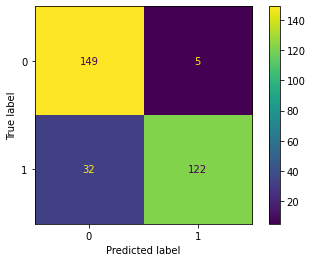

In [26]:
disp_knn = ConfusionMatrixDisplay(cm_knn)
disp_knn.plot()
plt.show()

##### Decision Tree

In [27]:
cm_dt = [[0,0],[0,0]]
for i in range(len(diagnoses)):
    cm_dt += confusion_matrix(diagnoses[i],guesseddiagnosesdt[i])

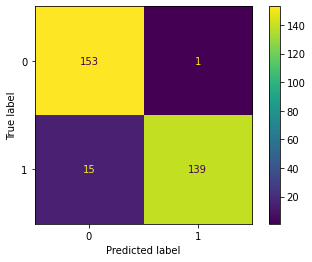

In [28]:
disp_dt = ConfusionMatrixDisplay(cm_dt)
disp_dt.plot()
plt.show()

##### Random Forest

In [29]:
cm_rf = [[0,0],[0,0]]
for i in range(len(diagnoses)):
    cm_rf += confusion_matrix(diagnoses[i],guesseddiagnosesrf[i])

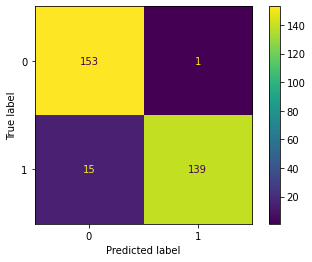

In [30]:
disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot()
plt.show()

##### 7.4.3. Learning Curve Result